In [2]:
#!pip install konlpy==0.5.2
# konlpy 설치

In [3]:
# NLTL 설치
# Text Processing을 위한 라이브러리인 nltk library(Natural Language Toolkit)를 설치 및 세팅
#!pip install nltk==3.6.1

In [4]:
import nltk

In [5]:
# NLTL 테스트
# 전처리하고자 하는 문장을 String 변수로 저장한다.
sentence = "NLTK is a leading platform for building Python programs to work with human language data."

# 각 문장을 토큰화 한 결과를 출력
nltk.word_tokenize(sentence)[:10]

['NLTK',
 'is',
 'a',
 'leading',
 'platform',
 'for',
 'building',
 'Python',
 'programs',
 'to']

In [6]:
#!pip install Jpype1

In [7]:
#!pip install tweepy==3.10.0

In [8]:
# Konlpy 테스트 (라이브러리가 정상적으로 작동하는지 확인)
from konlpy.tag import Okt

tokenizer = Okt()
tokens = tokenizer.pos("아버지 가방에 들어가신다.", norm=True,stem=True)
print(tokens)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [9]:
import os, pickle

# 파이썬 변수를 pickle 파일로 저장하는 방법
# wb = write binary
with open('raw_pos_tagged.pkl', 'wb') as f:
    pickle.dump(tokens, f)

In [10]:
# pickle 파일로부터 파이썬 변수를 불러오는 방법
with open('raw_pos_tagged.pkl','rb') as f:
    data = pickle.load(f)
    print(data)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [11]:
# 2. 크롤링 데이터 전처리
import numpy as np
import pandas as pd

In [12]:
# 2-1) 크롤링 데이터 불러오기 
# 저번에 엑셀파일로 저장했던 기사글!!
df = pd.read_excel('../Search_news_articles/result2_220830_1059.xlsx')
df.head()

,Title,Data,Article,URL,PressCompany
0,"ADD ""'열악한 환경' 속 자율주행 위한 데이터 확보""",2022.08.30. 오전 9:57,"""무인 자율주행차량 설계시 최적의 센서 조합 도출 기대""(국방과학연구소 제공)(서울...",https://n.news.naver.com/mnews/article/421/000...,뉴스1
1,"포항TP 경북SW진흥본부, 2022 동북권 공공데이터 챌린지 참가자 모집",2022.08.30. 오후 2:32,포항테크노파크(TP) 경북소프트웨어(SW)진흥본부가 9월 8일까지 '2022년 동북...,https://n.news.naver.com/mnews/article/030/000...,전자신문
2,"특허청, 5억만건 특허빅데이터 분석 '6대 전략기술' 맞춤 지원",2022.08.30. 오전 10:46,"기사내용 요약반도체, 2차전지 등 25개 중소·중견기업 및 9개 대학·공공연 대상초...",https://n.news.naver.com/mnews/article/003/001...,뉴시스
3,부산 빅데이터 혁신센터 개소…데이터 관련 사업화 지원,2022.08.29. 오전 8:18,빅데이터 (PG)[박은주 제작] 사진합성·일러스트 (부산=연합뉴스) 민영규 기...,https://n.news.naver.com/mnews/article/001/001...,연합뉴스
4,서울 1인 가구 빅데이터 분석해보니…노년층 고립 위험 커,2022.08.29. 오후 3:47,서울의 1인 가구는 전체 가구 대비 36.8%를 차지해 해마다 증가하는 추세입니다....,https://n.news.naver.com/mnews/article/055/000...,SBS


In [13]:
articles = df['Article'].tolist()
len(articles)

21

In [14]:
articles[-1] # 본문에 필요없는 단어들 안지웠다;;

'내년도 보건복지부(이하 복지부) 예산 정부안에 의료데이터·기술개발 분야 신규 예산이 대거 늘고 제약·바이오 분야 신규 예산이 전혀 포함되지 않은 것으로 나타났다. 다만 제약·바이오 분야에 기존 사업이 남아있어 착시 효과일 수 있다는 분석도 나온다.정부가 30일 국무회의를 통해 발표한 복지부 2023년도 정부 예산안에 따르면 복지부는 의료데이터와 디지털헬스케어 분야 투자에 총 200억원 이상의 신규 예산을 투입하는 것으로 나타났다.복지부는 \'휴·폐업 의료기관 진료기록보관시스템 구축\'을 위해 61억원의 신규 예산을 책정했다. 의료기관이 폐업하면서 환자 정보가 그대로 파기되거나 유출될 위험이 있는데, 이를 안전하게 보관하는 시스템을 만들겠다는 취지다.\xa0이와 함께 신규 사업으로 \'의료기관 기반 디지털헬스케어 실증 및 도입 사업\'을 편성했다. 내년에 75억원의 연구개발 예산이 투입된다. 기업이 만든 디지털치료제 등 디지털헬스케어 제품을 병원에서 사용해보는 일종의 ‘테스트베드’ 사업이다.아울러 \'암생존자 중심 근거 기반 맞춤형 헬스케어 기술개발 및 실증 연구사업\'도 새롭게 편성됐다. 암치료를 받은 환자가 재활과 식단 관리, 정신건강 돌봄 등의 서비스를 받을 수 있도록 관련 기술 개발에 나선다는 취지다. 내년에 96억원의 예산이 배정됐다.기존에 진행됐던 의료데이터와 의료기관 기반 서비스 개발 사업도 규모가 커졌다. 의료정보교류 의료기관이 8500개소로 1000개소가 늘어나며 원격협진 모형에 대한 실증도 실시한다. 의료정보교류는 의료기관끼리 환자 데이터를 교류하는데 불편함이 없도록 하는 제도이며, 원격협진은 서로 다른 병원에서 근무하는 의사가 원격으로 협력해 한 환자를 진료하는 방식이다.디지털헬스케어 및 의료데이터 기반 플랫폼 개발 업계는 정부의 산업 육성 의지가 이번 복지부 내년도 예산안에 반영됐다고 보고 있다. 디지털헬스케어 기업 관계자는 “정부의 육성 의지가 예산 반영뿐만 아니라 관련 법안 제정과 신속한 제품 허가, 규제 개선 등이 병행됐으면 한다”고

In [15]:
# 텍스트 데이터 전처리 과정 복습
# 1. 텍스트 데이터를 str자료형으로 준비
# ->
# 2. Tokenize(형태소 분석)
# 3. POS Tagging(Part-of-speech, 품사 표시)
# 4. Stopwords 제거(불용어 제거)
# ->
# 5. 단어 갯수 카운팅 & 단어 사전 생성
# 6. 단어 사전 기반 데이터 시각화
# 7. 머신러닝/딥러닝 모델 적용

In [16]:
# 1. 텍스트 데이터를 str자료형으로 준비
# example code
s = 'python is easy'
result = s.split()
print(result)

new_result = '___'.join(result)
print(new_result)

['python', 'is', 'easy']
python___is___easy


In [17]:
articles = ' '.join(articles)
articles[:1000]

'"무인 자율주행차량 설계시 최적의 센서 조합 도출 기대"(국방과학연구소 제공)(서울=뉴스1) 박응진 기자 = 국방과학연구소(ADD)는 무인 자율주행차량이 \'열악한 환경\'에서 안정적으로 주행하는 데 필요한 다양한 데이터를 싱가포르와의 공동 연구를 통해 확보했다고 30일 밝혔다.ADD는 지난 2020년 3월부터 싱가포르 국방과학연구기관 DSO와 함께 \'열악한 환경에서 주행 가능 영역 및 물체(장애물) 탐지 기술\'에 관한 연구를 실시해왔다며 이같이 전했다.ADD에 따르면 강설·연막 환경에선 ADD가, 강우·먼지 환경에선 싱가포르 DSO가 각각 총 6개 센서로 구성된 다중센서 데이터 획득 장치를 이용해 각종 데이터를 확보했다.양측은 각 환경에서 센서들의 성능 저하를 정량적으로 분석해 그 특성을 확인했고, 또 현재 활용 중인 주행 가능 영역 알고리즘과 물체 탐지 알고리즘에 그 데이터를 입력해 각 알고리즘의 성능·한계 등을 알아냈다고 한다. ADD는 "각 알고리즘의 성능분석을 통해 각 환경조건에 따른 무인 자율주행차량의 운용 가능 범위를 예측할 수 있게 됐다"며 "이번 연구를 통해 확보된 데이터는 향후 무인 자율주행차량 설계시 최적의 센서 조합을 도출하고 첨단 자율주행 기술의 활용성을 증대하는데 기여할 수 있을 것"이라고 기대했다.ADD는 또 "이번 연구성과는 자율주행 환경 인식 알고리즘 개발에도 활용할 수 있다"며 "첨단 자율주행 기술 개발의 예산·기간을 단축할 수 있어 효과적"이라고 부연했다. 포항테크노파크(TP) 경북소프트웨어(SW)진흥본부가 9월 8일까지 \'2022년 동북권 공공데이터 활용 챌린지\' 참가자를 모집한다. 동북권 ICT이노베이션스퀘어 확산사업 일환이다.행사는 공공데이터 활용 해커톤과 한국교통안전공단 데이터셋 활용 아이디어 경진대회로 구성됐다. 9월 29일부터 10월 1일까지 김천시에 위치한 경북ICT이노베이션스퀘어에서 진행한다.해커톤은 참여자가 팀을 꾸려 아이디어를 도출하고 협업해 결과물을 만드는 경연이다. 공모주제는 \'공공데이터를 활용

In [18]:
len(articles)

26055

In [19]:
# 2. Tokenize
# input date 에 품사를 태깅한다.
# norm 옵션 == 정규화(normalization)
# 한국어를 처리하는 예시입니닼ㅋㅋㅋ -> 한국어를 처리하는 예시입니다ㅋㅋ
# stem 옵션 == 어근화(stemming)
# 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리 Noun, 하다Verb...

from konlpy.tag import Okt

tokenizer = Okt()
raw_pos_tagged = tokenizer.pos(articles,norm=True,stem=True) # POS Tagging
raw_pos_tagged

# POS함수 실행했는데 Kernel이 죽는 오류가 날 경우 이모티콘이 있을 확률이 있다.

[('"', 'Punctuation'),
 ('무인', 'Noun'),
 ('자율', 'Noun'),
 ('주행', 'Noun'),
 ('차량', 'Noun'),
 ('설', 'Noun'),
 ('계시', 'Noun'),
 ('최적', 'Noun'),
 ('의', 'Josa'),
 ('센서', 'Noun'),
 ('조합', 'Noun'),
 ('도출', 'Noun'),
 ('기대', 'Noun'),
 ('"(', 'Punctuation'),
 ('국방', 'Noun'),
 ('과학', 'Noun'),
 ('연구소', 'Noun'),
 ('제공', 'Noun'),
 (')(', 'Punctuation'),
 ('서울', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴스', 'Noun'),
 ('1', 'Number'),
 (')', 'Punctuation'),
 ('박응진', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('국방', 'Noun'),
 ('과학', 'Noun'),
 ('연구소', 'Noun'),
 ('(', 'Punctuation'),
 ('ADD', 'Alpha'),
 (')', 'Punctuation'),
 ('늘다', 'Verb'),
 ('무인', 'Noun'),
 ('자율', 'Noun'),
 ('주행', 'Noun'),
 ('차량', 'Noun'),
 ('이', 'Josa'),
 ("'", 'Punctuation'),
 ('열악하다', 'Adjective'),
 ('환경', 'Noun'),
 ("'", 'Punctuation'),
 ('에서', 'Josa'),
 ('안정', 'Noun'),
 ('적', 'Suffix'),
 ('으로', 'Josa'),
 ('주행', 'Noun'),
 ('하다', 'Verb'),
 ('데', 'Noun'),
 ('필요하다', 'Adjective'),
 ('다양하다', 'Adjective'),
 ('데이터', 'Noun'),
 ('를', 'Josa

In [20]:
# 단어 등장 빈도 카운팅

# 정규화 및 어근화를 마치고 품사태깅까지 마친 상태에서,
# 조사, 어미, 구두점을 제외한 나머니 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 된다.

# 유의미한 의미를 갖고 있는 않은 단어를 제외할 수 있다.

del_list = ['하다', '있다','되다','이다','돼다','않다','그렇다','아니다','이렇다','그렇다','이떻다']

word_cleaned = []

for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
        if (len(word[0]) != 1) & (word[0] not in del_list): #한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들 제외
            word_cleaned.append(word[0])

word_cleaned

['무인',
 '자율',
 '주행',
 '차량',
 '계시',
 '최적',
 '센서',
 '조합',
 '도출',
 '기대',
 '국방',
 '과학',
 '연구소',
 '제공',
 '서울',
 '뉴스',
 '박응진',
 '기자',
 '국방',
 '과학',
 '연구소',
 'ADD',
 '늘다',
 '무인',
 '자율',
 '주행',
 '차량',
 '열악하다',
 '환경',
 '안정',
 '주행',
 '필요하다',
 '다양하다',
 '데이터',
 '싱가포르',
 '공동',
 '연구',
 '통해',
 '확보',
 '30일',
 '밝히다',
 'ADD',
 '늘다',
 '지난',
 '2020년',
 '3월',
 '싱가포르',
 '국방',
 '과학',
 '연구기관',
 'DSO',
 '오다',
 '함께',
 '열악하다',
 '환경',
 '주행',
 '가능',
 '영역',
 '물체',
 '장애물',
 '탐지',
 '기술',
 '연구',
 '실시',
 '해오다',
 '이같이',
 'ADD',
 '따르다',
 '강설',
 '연막',
 '환경',
 'ADD',
 '가다',
 '강우',
 '먼지',
 '환경',
 '싱가포르',
 'DSO',
 '가다',
 '각각',
 '센서',
 '구성',
 '다중',
 '센서',
 '데이터',
 '획득',
 '장치',
 '이용',
 '각종',
 '데이터',
 '확보',
 '측은',
 '환경',
 '센서',
 '성능',
 '저하',
 '정량',
 '분석',
 '특성',
 '확인',
 '현재',
 '활용',
 '중인',
 '주행',
 '가능',
 '영역',
 '알고리즘',
 '물체',
 '탐지',
 '알고리즘',
 '데이터',
 '입력',
 '알고리즘',
 '성능',
 '한계',
 '알아내다',
 'ADD',
 '늘다',
 '알고리즘',
 '성능분석',
 '통해',
 '환경',
 '조건',
 '따르다',
 '무인',
 '자율',
 '주행',
 '차량',
 '운용',
 '가능',
 '범위',
 '예측',
 '이번',
 '연구',
 '통해',
 '확

In [21]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'무인': 4,
 '자율': 20,
 '주행': 10,
 '차량': 4,
 '계시': 2,
 '최적': 8,
 '센서': 8,
 '조합': 2,
 '도출': 7,
 '기대': 3,
 '국방': 3,
 '과학': 10,
 '연구소': 2,
 '제공': 44,
 '서울': 9,
 '뉴스': 1,
 '박응진': 1,
 '기자': 11,
 'ADD': 6,
 '늘다': 15,
 '열악하다': 2,
 '환경': 16,
 '안정': 1,
 '필요하다': 9,
 '다양하다': 28,
 '데이터': 153,
 '싱가포르': 3,
 '공동': 4,
 '연구': 15,
 '통해': 34,
 '확보': 14,
 '30일': 8,
 '밝히다': 18,
 '지난': 9,
 '2020년': 3,
 '3월': 2,
 '연구기관': 2,
 'DSO': 2,
 '오다': 16,
 '함께': 12,
 '가능': 3,
 '영역': 15,
 '물체': 2,
 '장애물': 1,
 '탐지': 2,
 '기술': 33,
 '실시': 3,
 '해오다': 4,
 '이같이': 1,
 '따르다': 14,
 '강설': 1,
 '연막': 1,
 '가다': 4,
 '강우': 1,
 '먼지': 1,
 '각각': 5,
 '구성': 8,
 '다중': 1,
 '획득': 3,
 '장치': 1,
 '이용': 11,
 '각종': 5,
 '측은': 1,
 '성능': 5,
 '저하': 1,
 '정량': 3,
 '분석': 61,
 '특성': 4,
 '확인': 8,
 '현재': 2,
 '활용': 59,
 '중인': 2,
 '알고리즘': 9,
 '입력': 2,
 '한계': 2,
 '알아내다': 1,
 '성능분석': 1,
 '조건': 2,
 '운용': 1,
 '범위': 2,
 '예측': 7,
 '이번': 16,
 '향후': 3,
 '첨단': 3,
 '증대': 1,
 '기여': 3,
 '기대하다': 7,
 '인식': 1,
 '개발': 23,
 '예산': 21,
 '기간': 6,
 '단축': 1,
 '효과': 5,
 '부연': 1,
 '포

In [22]:
 # 위 cell에서의 작읍과 동일한 작업을 아래의 코드로 대체가능
    
from collections import Counter

result = Counter(word_cleaned)

word_dic2 = dict(result)
word_dic2

{'무인': 4,
 '자율': 20,
 '주행': 10,
 '차량': 4,
 '계시': 2,
 '최적': 8,
 '센서': 8,
 '조합': 2,
 '도출': 7,
 '기대': 3,
 '국방': 3,
 '과학': 10,
 '연구소': 2,
 '제공': 44,
 '서울': 9,
 '뉴스': 1,
 '박응진': 1,
 '기자': 11,
 'ADD': 6,
 '늘다': 15,
 '열악하다': 2,
 '환경': 16,
 '안정': 1,
 '필요하다': 9,
 '다양하다': 28,
 '데이터': 153,
 '싱가포르': 3,
 '공동': 4,
 '연구': 15,
 '통해': 34,
 '확보': 14,
 '30일': 8,
 '밝히다': 18,
 '지난': 9,
 '2020년': 3,
 '3월': 2,
 '연구기관': 2,
 'DSO': 2,
 '오다': 16,
 '함께': 12,
 '가능': 3,
 '영역': 15,
 '물체': 2,
 '장애물': 1,
 '탐지': 2,
 '기술': 33,
 '실시': 3,
 '해오다': 4,
 '이같이': 1,
 '따르다': 14,
 '강설': 1,
 '연막': 1,
 '가다': 4,
 '강우': 1,
 '먼지': 1,
 '각각': 5,
 '구성': 8,
 '다중': 1,
 '획득': 3,
 '장치': 1,
 '이용': 11,
 '각종': 5,
 '측은': 1,
 '성능': 5,
 '저하': 1,
 '정량': 3,
 '분석': 61,
 '특성': 4,
 '확인': 8,
 '현재': 2,
 '활용': 59,
 '중인': 2,
 '알고리즘': 9,
 '입력': 2,
 '한계': 2,
 '알아내다': 1,
 '성능분석': 1,
 '조건': 2,
 '운용': 1,
 '범위': 2,
 '예측': 7,
 '이번': 16,
 '향후': 3,
 '첨단': 3,
 '증대': 1,
 '기여': 3,
 '기대하다': 7,
 '인식': 1,
 '개발': 23,
 '예산': 21,
 '기간': 6,
 '단축': 1,
 '효과': 5,
 '부연': 1,
 '포

In [23]:
# 시각화 준비
# lambda 함수를 활용하여
# 앞서 만든 dict를 item단위(tuple)로 꺼내여, tuple(x)의 value(x[1])를
# 기준으로 하여 내림차순 정렬

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('데이터', 153),
 ('분석', 61),
 ('활용', 59),
 ('사업', 48),
 ('제공', 44),
 ('분야', 44),
 ('서비스', 39),
 ('통해', 34),
 ('기술', 33),
 ('기업', 31),
 ('기반', 31),
 ('정보', 31),
 ('지원', 30),
 ('다양하다', 28),
 ('공공', 28),
 ('위해', 27),
 ('전형', 26),
 ('개발', 23),
 ('지역', 23),
 ('평가', 23),
 ('빅데이터', 22),
 ('가구', 22),
 ('예산', 21),
 ('대회', 21),
 ('선정', 21),
 ('자율', 20),
 ('지능', 20),
 ('받다', 20),
 ('운영', 19),
 ('연구개발', 19),
 ('밝히다', 18),
 ('인공', 18),
 ('관련', 18),
 ('고교', 18),
 ('의료', 18),
 ('코드', 18),
 ('에프', 18),
 ('진행', 17),
 ('기준', 17),
 ('교육', 17),
 ('특허', 17),
 ('기관', 17),
 ('부산', 17),
 ('플랫폼', 17),
 ('환경', 16),
 ('오다', 16),
 ('이번', 16),
 ('국내', 16),
 ('없다', 16),
 ('학과', 16),
 ('AI', 16),
 ('대한', 16),
 ('늘다', 15),
 ('연구', 15),
 ('영역', 15),
 ('학생', 15),
 ('산업', 15),
 ('혁신', 15),
 ('전략', 15),
 ('정부', 15),
 ('확보', 14),
 ('따르다', 14),
 ('아이디어', 14),
 ('대상', 14),
 ('과제', 14),
 ('회사', 14),
 ('높다', 14),
 ('이화여대', 14),
 ('선발', 14),
 ('많다', 13),
 ('뉴시스', 13),
 ('계획', 13),
 ('사진', 13),
 ('가장', 13),
 ('올해', 13),
 ('기존', 

In [50]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같다.

for word, count in sorted_word_dic[:50]:
    print("{0}{1}".format(word,count), end=", ")

데이터153, 분석61, 활용59, 사업48, 제공44, 분야44, 서비스39, 통해34, 기술33, 기업31, 기반31, 정보31, 지원30, 다양하다28, 공공28, 위해27, 전형26, 개발23, 지역23, 평가23, 빅데이터22, 가구22, 예산21, 대회21, 선정21, 자율20, 지능20, 받다20, 운영19, 연구개발19, 밝히다18, 인공18, 관련18, 고교18, 의료18, 코드18, 에프18, 진행17, 기준17, 교육17, 특허17, 기관17, 부산17, 플랫폼17, 환경16, 오다16, 이번16, 국내16, 없다16, 학과16, 

In [ ]:
# 단어 등장 빈도 시각화

In [32]:
# matplot 에서 한글 표시 설정
import nltk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [61]:
! fc-list :lang=ko | grep ttf

/usr/share/fonts/truetype/unfonts-core/UnDinaruBold.ttf: 은 디나루,UnDinaru:style=Bold
/usr/share/fonts/truetype/unfonts-core/UnDinaru.ttf: 은 디나루,UnDinaru:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnBatang.ttf: 은 바탕,UnBatang:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnPilgi.ttf: 은 필기,UnPilgi:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnDinaruLight.ttf: 은 디나루,UnDinaru:style=Bold,Light
/usr/share/fonts/truetype/unfonts-core/UnGungseo.ttf: 은 궁서,UnGungseo:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnDotum.ttf: 은 돋움,UnDotum:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnGraphic.ttf: 은 그래픽,UnGraphic:style=Regular
/usr/share/fonts/truetype/unfonts-core/UnBatangBold.ttf: 은 바탕,UnBatang:style=Bold
/usr/share/fonts/truetype/unfonts-core/UnPilgiBold.ttf: 은 필기,UnPilgi:style=Bold
/usr/share/fonts/truetype/unfonts-core/UnDotumBold.ttf: 은 돋움,UnDotum:style=Bold
/usr/share/fonts/truetype/unfonts-core/UnGraphicBold.ttf: 은 그래픽,UnGraphic:style=Bold


In [62]:
# 한글 폰트 위치 넣기
font_name = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/unfonts-core/UnBatangBold.ttf").get_name()
matplotlib.rc('font', family=font_name)

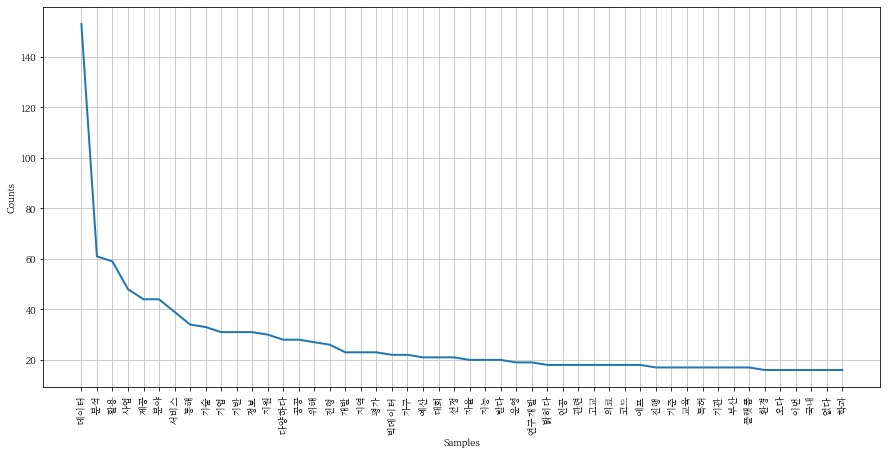

In [63]:
# nltk 라이브러리는 단어의 등장 빈도를 더욱 쉽게 셀 수 있는 .Text() 함수를 제공

word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15,7)) # plot 영역(그래프 영역)의 크기 지정

word_counted.plot(50) # "plot" the graph 상위 50개 단어 보여줌

# 한글 폰트 성공!!

In [32]:
# 2-5) 단어 등장 빈도 시각화 (막대 그래프)
# 막대그래프로의 시각화는 NLTK 의 함수만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화 진행

word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution
word_frequency

FreqDist({'데이터': 153, '분석': 61, '활용': 59, '사업': 48, '제공': 44, '분야': 44, '서비스': 39, '통해': 34, '기술': 33, '기업': 31, ...})

In [36]:
# 단어 빈도가 담긴 Dist 로부터 값을 가져와 DataFrame을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys())

# 빈도 내림차순으로 정렬
result = df.sort_values([0], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화
result = result[:50]

result

,0
데이터,153
분석,61
활용,59
사업,48
분야,44
제공,44
서비스,39
통해,34
기술,33
기반,31


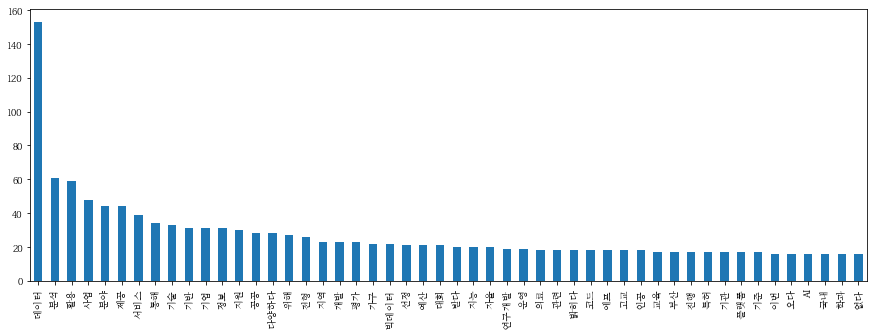

In [40]:
# 데이터프레임에 담긴 단어 및 빈도 수를 막대그래프로 표현하기 위한 코드

result.plot(kind= 'bar', legend=False, figsize=(15,5)) #'bar graph'

plt.show()
